In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy.stats import sem

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap, BoundaryNorm

from venn import venn, pseudovenn
import seaborn as sns

from Bio import SeqIO, SeqUtils

from addict import Dict

import math

In [4]:
sys.path.append("../")
import plotting as my_plot

sys.path.append("./mean_field_elect/")
import proteomics_functions as prot_fun

(<Figure size 100x100 with 1 Axes>, <Axes: >)

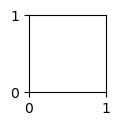

In [5]:
my_plot.instantiate_fig(1, 1)

In [6]:
df_risk_reviewed = pd.read_csv('./generated_tables/high_risk_reviewed.csv')
df_risk_reviewed['native_hccf_lmw2'] = False

df_std_master = df_risk_reviewed[(df_risk_reviewed.std_hccf_feed) | 
                          (df_risk_reviewed.std_hccf_large) | 
                          (df_risk_reviewed.std_hccf_small) | 
                          (df_risk_reviewed.std_hccf_mab) | 
                          (df_risk_reviewed.std_hccf_lmw1) | 
                          (df_risk_reviewed.std_hccf_lmw2) |
                          (df_risk_reviewed.std_pafvin_feed) | 
                          (df_risk_reviewed.std_pafvin_large) |
                          (df_risk_reviewed.std_pafvin_small) |
                          (df_risk_reviewed.std_pafvin_mab)].copy()

df_native_master = df_risk_reviewed[(df_risk_reviewed.native_hccf_feed) | 
                             (df_risk_reviewed.native_hccf_large) | 
                             (df_risk_reviewed.native_hccf_small) | 
                             (df_risk_reviewed.native_hccf_mab) | 
                             (df_risk_reviewed.native_hccf_lmw1) | 
                             (df_risk_reviewed.native_pafvin_feed) | 
                             (df_risk_reviewed.native_pafvin_large) |
                             (df_risk_reviewed.native_pafvin_small) |
                             (df_risk_reviewed.native_pafvin_mab)].copy()

df_hccf = df_risk_reviewed[(df_risk_reviewed.std_hccf_feed) | 
                    (df_risk_reviewed.std_hccf_large) | 
                    (df_risk_reviewed.std_hccf_small) | 
                    (df_risk_reviewed.std_hccf_mab) | 
                    (df_risk_reviewed.std_hccf_lmw1) | 
                    (df_risk_reviewed.std_hccf_lmw2) |
                    (df_risk_reviewed.native_hccf_feed) | 
                    (df_risk_reviewed.native_hccf_large) | 
                    (df_risk_reviewed.native_hccf_small) | 
                    (df_risk_reviewed.native_hccf_mab) | 
                    (df_risk_reviewed.native_hccf_lmw1)].copy()

df_std_hccf = df_risk_reviewed[(df_risk_reviewed.std_hccf_feed) | 
                        (df_risk_reviewed.std_hccf_large) | 
                        (df_risk_reviewed.std_hccf_small) | 
                        (df_risk_reviewed.std_hccf_mab) | 
                        (df_risk_reviewed.std_hccf_lmw1) | 
                        (df_risk_reviewed.std_hccf_lmw2)].copy()

df_native_hccf = df_risk_reviewed[(df_risk_reviewed.native_hccf_feed) | 
                           (df_risk_reviewed.native_hccf_large) | 
                           (df_risk_reviewed.native_hccf_small) | 
                           (df_risk_reviewed.native_hccf_mab) | 
                           (df_risk_reviewed.native_hccf_lmw1)].copy()

df_pafvin = df_risk_reviewed[(df_risk_reviewed.std_pafvin_feed) | 
                      (df_risk_reviewed.std_pafvin_large) |
                      (df_risk_reviewed.std_pafvin_small) |
                      (df_risk_reviewed.std_pafvin_mab) |
                      (df_risk_reviewed.native_pafvin_feed) | 
                      (df_risk_reviewed.native_pafvin_large) |
                      (df_risk_reviewed.native_pafvin_small) |
                      (df_risk_reviewed.native_pafvin_mab)].copy()

df_std_pafvin = df_risk_reviewed[(df_risk_reviewed.std_pafvin_feed) | 
                          (df_risk_reviewed.std_pafvin_large) |
                          (df_risk_reviewed.std_pafvin_small) |
                          (df_risk_reviewed.std_pafvin_mab)].copy()

df_native_pafvin = df_risk_reviewed[(df_risk_reviewed.native_pafvin_feed) | 
                             (df_risk_reviewed.native_pafvin_large) |
                             (df_risk_reviewed.native_pafvin_small) |
                             (df_risk_reviewed.native_pafvin_mab)].copy()

In [7]:
names = []
std_unique = []
instersection = []
native_unique = []

names, std_unique, instersection, native_unique = prot_fun.add_entry(r'HCCF $\bigcup$ PAVIN', df_std_master.accession.values, df_native_master.accession.values,
                                                            names, std_unique, instersection, native_unique)
names, std_unique, instersection, native_unique = prot_fun.add_entry('HCCF Union', df_std_hccf.accession.values, df_native_hccf.accession.values,
                                                            names, std_unique, instersection, native_unique)

for sample in ['hccf_feed', 'hccf_large', 'hccf_small', 'hccf_mab', 'hccf_lmw1', 'hccf_lmw2']:
    df_std_accn = df_risk_reviewed[df_risk_reviewed[f'std_{sample}']].accession.values
    df_nat_accn = df_risk_reviewed[df_risk_reviewed[f'native_{sample}']].accession.values
    names, std_unique, instersection, native_unique = prot_fun.add_entry(sample, df_std_accn, df_nat_accn, names, std_unique, instersection, native_unique)
    
names, std_unique, instersection, native_unique = prot_fun.add_entry('PAVIN Union', df_std_pafvin.accession.values, df_native_pafvin.accession.values,
                                                            names, std_unique, instersection, native_unique)

for sample in ['pafvin_feed', 'pafvin_large', 'pafvin_small', 'pafvin_mab']:
    df_std_accn = df_risk_reviewed[df_risk_reviewed[f'std_{sample}']].accession.values
    df_nat_accn = df_risk_reviewed[df_risk_reviewed[f'native_{sample}']].accession.values
    names, std_unique, instersection, native_unique = prot_fun.add_entry(sample, df_std_accn, df_nat_accn, names, std_unique, instersection, native_unique)
    
nice_names_dic = {'hccf_feed':'HCCF Feed',
                  'hccf_large':'HCCF Large agg.',
                  'hccf_small':'HCCF Small agg.',
                  'hccf_mab':'HCCF mAb',
                  'hccf_lmw1':'HCCF SPF 1',
                  'hccf_lmw2':'HCCF SPF 2',
                  'pafvin_feed':'PAVIN Feed',
                  'pafvin_large':'PAVIN Large agg.',
                  'pafvin_small':'PAVIN Small agg.',
                  'pafvin_mab':'PAVIN mAb'}

nice_names = []
for n in names:
    if n in nice_names_dic.keys():
        nice_names.append(nice_names_dic[n])
    else:
        nice_names.append(n)
        
df_bar = pd.DataFrame({'name':nice_names, 'std_unique':std_unique, 'intersection':instersection, 'native_unique':native_unique})

df_bar['std_total'] = df_bar.std_unique + df_bar.intersection
df_bar['native_total'] = df_bar.native_unique + df_bar.intersection

In [8]:
df_bar

,name,std_unique,intersection,native_unique,std_total,native_total
0,HCCF $\bigcup$ PAVIN,3,43,10,46,53
1,HCCF Union,3,42,10,45,52
2,HCCF Feed,2,33,6,35,39
3,HCCF Large agg.,4,25,13,29,38
4,HCCF Small agg.,2,28,6,30,34
5,HCCF mAb,0,27,9,27,36
6,HCCF SPF 1,3,36,6,39,42
7,HCCF SPF 2,36,0,0,36,0
8,PAVIN Union,1,27,10,28,37
9,PAVIN Feed,0,5,7,5,12


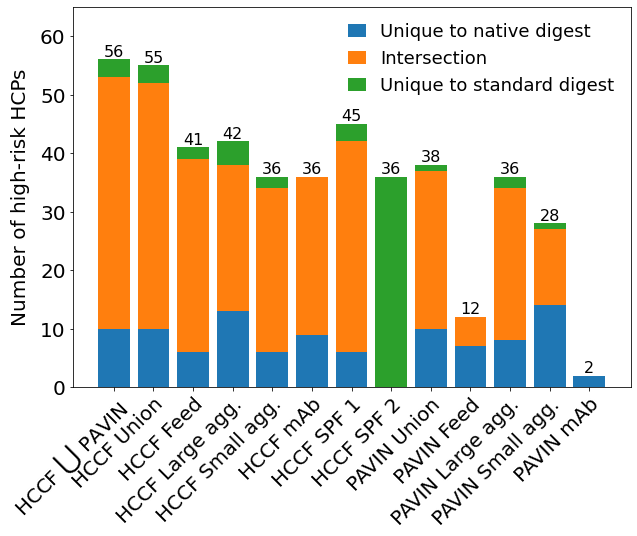

In [9]:
fig, ax = my_plot.instantiate_fig(x=10, y=7, ylabel='Number of high-risk HCPs')
ticks = ax.set_xticks(df_bar.index, df_bar.name, rotation=45, ha='right', rotation_mode='anchor')

rects_1 = ax.bar(df_bar.index, df_bar.native_unique, label='Unique to native digest')
rects_2 = ax.bar(df_bar.index, df_bar.intersection, label='Intersection', bottom=df_bar.native_unique)
rects_3 = ax.bar(df_bar.index, df_bar.std_unique, label='Unique to standard digest', bottom=df_bar.native_total)

# text_1 = ax.annotate('HCCF', xy=(0.35, -0.45), xytext=(0.35, -0.55), xycoords='axes fraction', ha='center', 
#                      va='bottom', arrowprops=dict(arrowstyle='-[, widthB=6.45, lengthB=0.7', lw=2.0))
# text_2 = ax.annotate('PAVIN', xy=(0.77, -0.45), xytext=(0.77, -0.55), xycoords='axes fraction', ha='center', 
#                      va='bottom', arrowprops=dict(arrowstyle='-[, widthB=4.4, lengthB=0.7', lw=2.0))

bar_labels = ax.bar_label(rects_3, fontsize=16)
legend = ax.legend(handlelength=1, frameon=False, fontsize=18, handletextpad=0.8)
ylim = ax.set_ylim(0, 65)

# plt.savefig('./images/5_stacked_bar_chart_high_risk.png', dpi=300, bbox_inches='tight')
# plt.savefig('./images/5_stacked_bar_chart_high_risk.tif', dpi=300, bbox_inches='tight')
# plt.savefig('./images/5_stacked_bar_chart_high_risk.eps', dpi=300, bbox_inches='tight')

In [10]:
df_bar.to_csv('./generated_tables/high_risk_bar.csv', index=False)

In [17]:
# df_bar_total = pd.read_csv('./generated_tables/std_vs_native_bar.csv')

# fig, ax = plt.subplots(2, 1, sharex=True)
# fig.set_size_inches(10, 15, forward=True)
# plt.subplots_adjust(hspace=0.06)
# ax[0].set_ylabel('Number of HCPs')
# ax[1].set_ylabel('Number of high-risk HCPs')
# ax[0].set_ylim(0, 3000)
# ax[1].set_ylim(0, 40)
# ax[1].set_xticks(df_bar.index, df_bar.name, rotation=45, ha='right', rotation_mode='anchor')

# for i, df in enumerate([df_bar_total, df_bar]):
#     rects_1 = ax[i].bar(df.index, df.native_unique, label='Unique to native digest')
#     rects_2 = ax[i].bar(df.index, df.intersection, label='Intersection', bottom=df.native_unique)
#     rects_3 = ax[i].bar(df.index, df.std_unique, label='Unique to standard digest', bottom=df.native_total)
    
#     bar_labels = ax[i].bar_label(rects_3, fontsize=16)
#     legend = ax[i].legend(handlelength=1, frameon=False, fontsize=16, handletextpad=0.8)
    
# t = ax[0].annotate('(A)', xytext=(-4, 2925), xy=(0, 0), weight='bold', fontsize=22)
# t = ax[1].annotate('(B)', xytext=(-4, 38), xy=(0, 0), weight='bold', fontsize=22)

# # plt.savefig('./images/5_stacked_bar_chart_total_and_high_risk.png', dpi=300, bbox_inches='tight')